In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/Users/jessiexiong/Desktop/preprocessed/b-test.csv')
data

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,-632.55413,-464.77713,-319.84153,-313.30638,36.27217,-13.55798,0.63779,0.84635,-448.93280,-438.11205,...,0.02715,0.02815,0.00581,0.00310,0.00226,0.00387,0.00181,0.00649,0.00151,1.0
1,14.36622,9.02563,9.31294,9.59220,-3.66945,-6.77996,-1.01670,-3.00561,4.23396,8.16198,...,0.02265,0.03048,0.00776,0.00465,0.00455,0.00222,0.00158,0.00393,0.00287,1.0
2,23.84970,-5.97114,2.00823,4.37346,-16.88866,15.18927,14.09191,-0.56374,34.90172,-13.68915,...,0.00140,0.00547,0.00311,0.00141,0.00155,0.00345,0.00325,0.00245,0.00136,1.0
3,-395.78789,-282.40165,-178.44059,-174.95711,-243.71179,-321.40315,-159.32955,-157.94618,-298.46577,-146.89583,...,0.02920,0.03735,0.01385,0.00849,0.00618,0.00388,0.00396,0.00273,0.00216,0.0
4,-469.88683,-614.04482,-333.31084,-328.16136,0.13096,5.13976,0.13841,1.52704,-470.51339,-622.11413,...,0.05366,0.08236,0.02827,0.01588,0.01094,0.00847,0.00354,0.00439,0.00665,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,58.77315,10.79600,12.32300,-4.79704,-25.10559,-17.30562,-7.61847,-5.72821,85.90159,33.92513,...,0.03610,0.05159,0.02053,0.00995,0.00545,0.00529,0.00670,0.00384,0.00153,0.0
1172,41.90976,-96.90947,-6.60463,-10.83695,-19.99803,-17.71022,-11.18951,-10.05006,76.43298,-71.50214,...,0.13063,0.18636,0.05654,0.03055,0.02590,0.02013,0.01802,0.01398,0.01111,0.0
1173,-396.44124,-303.40478,-182.05478,-178.09819,2.14805,2.46233,1.82104,1.04799,-399.09244,-304.82338,...,0.02224,0.13425,0.01508,0.00497,0.00848,0.00599,0.00336,0.00532,0.00882,0.0
1174,-459.54690,-402.50104,-237.07238,-232.48756,-33.12614,-10.18965,-13.69952,-12.15816,-429.96694,-393.01263,...,0.00584,0.05130,0.00817,0.00280,0.00404,0.00449,0.00438,0.00119,0.00630,1.0


In [3]:
data['Label'].value_counts()

1.0    588
0.0    588
Name: Label, dtype: int64

In [4]:
label_mapping = {'Relaxed': 0, 'Concentrated': 1}

In [5]:
def preprocess_inputs(df):
    df = df.copy()
    
    
    y = df['Label'].copy()
    X = df.drop('Label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [7]:
X_train

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
246,40.65537,-5.12587,5.40203,-6.70313,2.33137,0.67382,4.12017,-0.17253,45.76809,-1.51215,...,0.01653,0.03425,0.04102,0.00720,0.00475,0.00408,0.00764,0.00717,0.00483,0.00812
1009,-497.11389,-478.40422,-402.11158,-396.27699,-2.51424,-3.66157,-5.49825,-2.05941,-493.48696,-475.04153,...,0.02423,0.06364,0.08555,0.03530,0.01526,0.01802,0.00214,0.00777,0.01077,0.00837
431,24.49995,20.34522,33.43521,25.78797,-19.71613,-41.09932,26.42427,15.30655,32.11592,45.79592,...,0.05626,0.16943,0.21449,0.07266,0.04012,0.02999,0.02184,0.01190,0.01163,0.01882
102,55.94245,36.10842,26.65242,24.18881,-8.68223,-6.05912,-3.47516,-2.35183,55.81424,30.77370,...,0.12220,0.31399,0.42398,0.11817,0.07980,0.05999,0.04571,0.02570,0.01967,0.01347
308,-400.01029,-303.67819,-189.38979,-185.36353,-0.28635,-2.72801,-0.04381,0.25425,-398.31062,-300.78970,...,0.02770,0.07760,0.10679,0.03062,0.02163,0.01207,0.00699,0.00793,0.00489,0.00327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-489.19031,-643.79896,-357.32888,-353.55452,-9.81430,-12.74423,-6.77121,-0.98398,-488.92225,-638.58530,...,0.01039,0.01795,0.09397,0.01201,0.00281,0.00513,0.00041,0.00176,0.00172,0.00152
1147,-398.84222,-304.85566,-186.18597,-181.93002,2.60495,0.38443,6.37878,6.51269,-399.00091,-305.02401,...,0.01282,0.02232,0.13715,0.01990,0.00868,0.00677,0.00343,0.00257,0.00270,0.00218
106,37.20249,-9.63909,9.90801,-5.40994,-24.20661,-18.67018,3.29271,17.27392,44.82457,-1.58925,...,0.03097,0.07372,0.10031,0.03552,0.01864,0.01076,0.01074,0.00893,0.01275,0.00762
1041,52.95540,-99.00649,-0.57475,-5.04624,4.02571,-19.61873,-2.16663,-2.98198,37.93795,-98.26754,...,0.04602,0.11926,0.16711,0.04779,0.02801,0.02170,0.01763,0.01307,0.01277,0.01454


In [8]:
X_test

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
772,13.39603,5.96764,8.02252,8.37353,4.15383,1.34713,0.11239,1.34190,16.98297,9.55623,...,0.02189,0.04148,0.05375,0.02114,0.01120,0.01481,0.00646,0.00602,0.00736,0.00212
1047,46.42001,6.27852,7.80921,-19.31205,-6.26033,0.29103,-0.43890,-2.03942,50.38709,5.99440,...,0.03460,0.10638,0.13328,0.03989,0.02011,0.01653,0.01174,0.01674,0.00972,0.01568
72,47.42587,58.66367,18.29957,22.44312,3.44732,9.73675,20.38870,28.12449,48.93017,61.48818,...,0.00196,0.01685,0.02758,0.01583,0.01352,0.01092,0.01035,0.01155,0.01155,0.01210
319,-472.14160,-464.98404,-266.10935,-260.74717,0.52358,-0.31641,-2.38350,-1.96267,-469.34317,-462.24141,...,0.01152,0.00695,0.08807,0.01271,0.01075,0.00508,0.00930,0.00227,0.01382,0.01333
1084,48.10987,-14.73357,8.10896,-5.33795,-72.41243,-37.06827,-13.87233,-17.01598,132.22925,28.24232,...,0.02223,0.05923,0.08215,0.02083,0.01408,0.01084,0.01120,0.00536,0.00333,0.00232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,6.47831,11.07881,8.28208,6.97798,15.12695,2.98742,2.43371,2.85373,2.82750,11.69582,...,0.00126,0.00204,0.02071,0.00228,0.00056,0.00241,0.00043,0.00202,0.00068,0.00359
345,-516.30650,-499.31430,-414.98651,-409.20710,11.54804,11.62283,13.64184,13.52730,-521.90117,-505.42540,...,0.02330,0.05903,0.07646,0.02452,0.01361,0.00787,0.00791,0.01267,0.00658,0.00627
813,8.35603,6.60759,5.36747,5.04789,27.00908,4.60856,-0.66544,-1.27185,-27.57376,-5.39162,...,0.00278,0.00399,0.03365,0.00297,0.00276,0.00025,0.00728,0.00396,0.00352,0.00283
388,-421.01856,-332.73392,-201.74638,-197.73655,-8.10179,5.86159,-22.22131,-16.83117,-420.09499,-336.18233,...,0.00970,0.03390,0.04437,0.01366,0.00860,0.00418,0.00535,0.00375,0.00237,0.00435


In [9]:
y_test

772     1.0
1047    0.0
72      1.0
319     1.0
1084    1.0
       ... 
453     1.0
345     0.0
813     1.0
388     0.0
367     1.0
Name: Label, Length: 353, dtype: float64

In [10]:
#Model architecture

# creates an input layer with the shape of the input data.
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# adds a new dimension to the tensor to make it 3D. 
# This is required for the GRU layer to work since it expects a 3D tensor with 
# shape [batch, timesteps, feature] as input
expand_dims = tf.expand_dims(inputs, axis=2)


# defines a GRU layer with 256 units and returns a sequence of outputs for each input time step. 
# The return_sequences=True argument ensures that the GRU returns a sequence rather than just the last output.
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

# returns 0 for negative input values and 1 for positive input values. 
relu = tf.keras.layers.ReLU()(gru)

#flattens the output of the relu layer to a 2D tensor.
# can be helpful and reduce the number of parameters in the model
flatten = tf.keras.layers.Flatten()(relu)

# #adds a dense layer with 1 output unit and a sigmoid activation function. 
# #This layer produces the final prediction.
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


# create model
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
Model: "functional_1"

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 988)]             0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 988, 1)           0         
                                                                 
 gru (GRU)                   (None, 988, 256)          198912    
                                                                 
 re_lu (ReLU)                (None, 988, 256)          0         
                                                                 
 flatten (Flatten)           (None, 252928)            0         
                                                                 
 dense (Dense)               (None, 1)                 252929    
                                                                 
Total params: 451,841
Trainable params: 451,841
Non-trainable

In [12]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [13]:
#
import tensorflow
model.compile(
    # purpose of optimzier is to changing the weights of the model to keep loss as low as possible
    optimizer='adam',
#     loss='sparse_categorical_crossentropy',
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)



history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
    class_weight={0: 1, 1: 1},
    callbacks=[
        # to prevent overfitting
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            # number of epochs to wait before stopping the training process if the validation loss does not improve
            patience=5,
            # restore the weights of the best epoch
            restore_best_weights=True,
        ),
        tensorboard_callback

    ]
)

Epoch 1/50


2023-03-16 18:55:27.255408: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11/11 [==============================] - 24s 2s/step - loss: 2.0103 - accuracy: 0.6353 - auc: 0.7179 - val_loss: 1.1487 - val_accuracy: 0.7697 - val_auc: 0.8848
Epoch 2/50
11/11 [==============================] - 24s 2s/step - loss: 1.0499 - accuracy: 0.8100 - auc: 0.8527 - val_loss: 0.4998 - val_accuracy: 0.8424 - val_auc: 0.9287
Epoch 3/50
11/11 [==============================] - 22s 2s/step - loss: 0.4462 - accuracy: 0.8283 - auc: 0.9122 - val_loss: 0.4367 - val_accuracy: 0.8727 - val_auc: 0.9388
Epoch 4/50
11/11 [==============================] - 21s 2s/step - loss: 0.2582 - accuracy: 0.8875 - auc: 0.9580 - val_loss: 0.2340 - val_accuracy: 0.8788 - val_auc: 0.9705
Epoch 5/50
11/11 [==============================] - 22s 2s/step - loss: 0.1701 - accuracy: 0.9255 - auc: 0.9828 - val_loss: 0.1957 - val_accuracy: 0.9212 - val_auc: 0.9785
Epoch 6/50
11/11 [==============================] - 22s 2s/step - loss: 0.1466 - accuracy: 0.9362 - auc: 0.9874 - val_loss: 0.1655 - val_accuracy: 0.93

In [14]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 91.501%


12/12 [==============================] - 7s 583ms/step
Confusion Matrix:
 [[165  16]
 [ 14 158]]


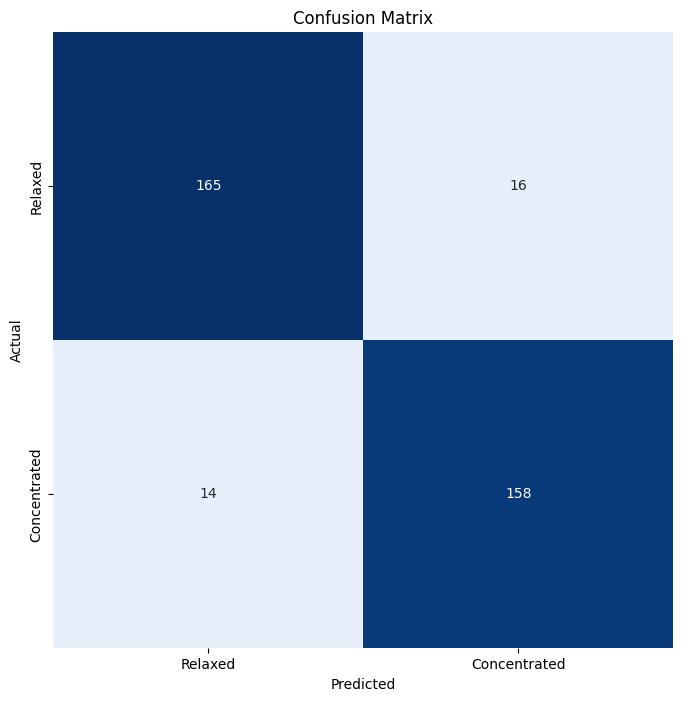

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = np.round(model.predict(X_test))
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",(cm))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(2) + 0.5, label_mapping.keys())
plt.yticks(np.arange(2) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score

# assuming y_true and y_pred are your true and predicted binary labels respectively
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.915103430553771


In [18]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [19]:
# serialize model to JSON
modelbci0225_json = model.to_json()
with open("modelbci_demo.json", "w") as json_file:
    json_file.write(modelbci0225_json)
# serialize weights to HDF5
model.save_weights("modelbci_demo.h5")
model.save("modelbci_demo")
print("Saved model to disk")

INFO:tensorflow:Assets written to: modelbci_demo/assets


INFO:tensorflow:Assets written to: modelbci_demo/assets


Saved model to disk


In [20]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("modelbci_demo")

# Let's check:
np.testing.assert_allclose(model.predict(X_test), reconstructed_model.predict(X_test))

12/12 [==============================] - 10s 761ms/step


In [21]:
y_pred = np.round(model.predict(X_test))
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print("Classification Report:\n----------------------\n", clr)

12/12 [==============================] - 8s 667ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

     Relaxed       0.92      0.91      0.92       181
Concentrated       0.91      0.92      0.91       172

    accuracy                           0.92       353
   macro avg       0.91      0.92      0.91       353
weighted avg       0.92      0.92      0.92       353



In [22]:
x_pred = np.round(model.predict(X_test[:5]))
print(x_pred)
print(y_test[:5])

1/1 [==============================] - 0s 119ms/step
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]]
772     1.0
1047    0.0
72      1.0
319     1.0
1084    1.0
Name: Label, dtype: float64
